In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


bandarbeyla so
mar del plata ar
rikitea pf
bhachau in
olafsvik is
kodiak us
codrington ag
san quintin mx
kununurra au
souillac mu
burnie au
la ronge ca
buraydah sa
pasighat in
tolaga bay nz
nagua do
valparaiso cl
atar mr
florianopolis br
vaini to
cape town za
tasiilaq gl
muravlenko ru
mahebourg mu
port alfred za
darnah ly
kamenka ru
komsomolskiy ru
saleaula ws
yellowknife ca
port blair in
nizhneyansk ru
belushya guba ru
longyearbyen sj
jamestown sh
bac lieu vn
rikitea pf
port alfred za
rajauri in
cayenne gf
bengkulu id
viedma ar
albany au
dicabisagan ph
hermanus za
bluff nz
skjervoy no
butaritari ki
provideniya ru
ushuaia ar
grand centre ca
saskylakh ru
tuktoyaktuk ca
cape town za
atuona pf
hermanus za
hambantota lk
ornskoldsvik se
dudinka ru
beloha mg
dalbandin pk
los llanos de aridane es
punta arenas cl
vulcan ca
najran sa
saldanha za
kapaa us
awbari ly
rio gallegos ar
port alfred za
mataura pf
mitu co
lompoc us
nikolskoye ru
rikitea pf
taikang cn
srednekolymsk ru
rikitea pf
east lon

port alfred za
bundaberg au
the pas ca
chokurdakh ru
ushuaia ar
vaini to
rikitea pf
port alfred za
illoqqortoormiut gl
shu kz
acarau br
la ronge ca
carnarvon au
hilo us
severo-kurilsk ru
mahebourg mu
hermanus za
east london za
ixtapa mx
souillac mu
saleaula ws
atuona pf
new norfolk au
astipalaia gr
la ronge ca
yellowknife ca
jamestown sh
kaitangata nz
marcona pe
butaritari ki
tuktoyaktuk ca
ribeira grande pt
hermanus za
cape town za
jamestown sh
dharchula in
vaini to
egvekinot ru
ust-kamchatsk ru
benguela ao
kapaa us
ribeira grande pt
lac du bonnet ca
spartanburg us
chiang rai th
jamestown sh
kapaa us
saint george bm
puerto ayora ec
mataura pf
busselton au
qaanaaq gl
butaritari ki
turukhansk ru
edgewater us
bluff nz
karaul ru
solsvik no
jiazi cn
atuona pf
rikitea pf
catamarca ar
new norfolk au
atuona pf
rocha uy
thompson ca
codrington ag
kokoda pg
uyutne ua
rikitea pf
vaini to
kapaa us
qaanaaq gl
albany au
bluff nz
avarua ck
bukama cd
amderma ru
boralday kz
taoudenni ml
hauterive ca
tu

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)

# Get JSON response for parsing of information
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 74.12,
  'feels_like': 72.41,
  'temp_min': 71.6,
  'temp_max': 75.2,
  'pressure': 1009,
  'humidity': 25},
 'visibility': 10000,
 'wind': {'speed': 18.41, 'deg': 260, 'gust': 34.52},
 'clouds': {'all': 40},
 'dt': 1618947910,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618912490,
  'sunset': 1618961456},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bhachau
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | san quintin
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | burnie
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | buraydah
Processing Record 14 of Set 1 | pasighat
Processing Record 15 of Set 1 | tolaga bay
Processing Record 16 of Set 1 | nagua
Processing Record 17 of Set 1 | valparaiso
Processing Record 18 of Set 1 | atar
Processing Record 19 of Set 1 | florianopolis
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | muravle

Processing Record 38 of Set 4 | gushi
Processing Record 39 of Set 4 | barrow
Processing Record 40 of Set 4 | kaseda
Processing Record 41 of Set 4 | saint-francois
Processing Record 42 of Set 4 | marsh harbour
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | san policarpo
Processing Record 45 of Set 4 | ozernovskiy
Processing Record 46 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | bay city
Processing Record 50 of Set 4 | anloga
Processing Record 1 of Set 5 | yablonovo
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | senanga
Processing Record 7 of Set 5 | mangan
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | yar-sale
Processing Record 10

Processing Record 28 of Set 8 | uarini
Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | gambiran
Processing Record 31 of Set 8 | indianola
Processing Record 32 of Set 8 | shingu
Processing Record 33 of Set 8 | itacoatiara
Processing Record 34 of Set 8 | chapais
Processing Record 35 of Set 8 | plock
Processing Record 36 of Set 8 | canon city
Processing Record 37 of Set 8 | rexburg
Processing Record 38 of Set 8 | gboko
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | olavarria
Processing Record 41 of Set 8 | porirua
Processing Record 42 of Set 8 | ponta do sol
Processing Record 43 of Set 8 | ilulissat
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | piney green
Processing Record 47 of Set 8 | takoradi
Processing Record 48 of Set 8 | torbay
Processing Record 49 of Set 8 | kharan
Processing Record 50 of Set 8 | heishan
Processing Record 1 of Set 9 | kemin
Processin

Processing Record 18 of Set 12 | haflong
Processing Record 19 of Set 12 | ferkessedougou
Processing Record 20 of Set 12 | raton
Processing Record 21 of Set 12 | bad bevensen
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | santiago
Processing Record 24 of Set 12 | liverpool
Processing Record 25 of Set 12 | hobyo
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | estelle
Processing Record 28 of Set 12 | yenagoa
Processing Record 29 of Set 12 | te anau
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | khujner
Processing Record 33 of Set 12 | fukuma
Processing Record 34 of Set 12 | kurumkan
Processing Record 35 of Set 12 | mindelo
Processing Record 36 of Set 12 | port macquarie
Processing Record 37 of Set 12 | saint-leu
Processing Record 38 of Set 12 | ryotsu
Processing Record 39 of Set 12 | sotnikovo
Processing Record 40 of Set 12 | springdale
Processing Record 41 of Set 12 | c

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bandarbeyla,9.4942,50.8122,82.11,76,100,8.23,SO,2021-04-20 19:48:42
1,Mar Del Plata,-38.0023,-57.5575,69.80,78,20,19.57,AR,2021-04-20 19:45:00
2,Rikitea,-23.1203,-134.9692,77.49,73,59,5.28,PF,2021-04-20 19:48:42
3,Bhachau,23.2833,70.3500,80.53,48,71,7.81,IN,2021-04-20 19:48:43
4,Olafsvik,64.8945,-23.7142,39.90,74,36,11.16,IS,2021-04-20 19:44:03
5,Kodiak,57.7900,-152.4072,42.80,87,90,6.91,US,2021-04-20 19:46:29
6,Codrington,-38.2667,141.9667,50.41,57,100,5.44,AU,2021-04-20 19:48:43
7,San Quintin,30.4833,-115.9500,65.88,66,41,14.41,MX,2021-04-20 19:48:44
8,Kununurra,-15.7667,128.7333,66.20,88,7,2.19,AU,2021-04-20 19:48:44
9,Souillac,-20.5167,57.5167,77.00,94,75,5.99,MU,2021-04-20 19:48:44


In [13]:
# Create new dataframe for refactored data
city_refactored_df = pd.DataFrame(city_data)
# Reorder the columns to make the data table easier to read 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_refactored_df = city_refactored_df[new_column_order]
city_refactored_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bandarbeyla,SO,2021-04-20 19:48:42,9.4942,50.8122,82.11,76,100,8.23
1,Mar Del Plata,AR,2021-04-20 19:45:00,-38.0023,-57.5575,69.80,78,20,19.57
2,Rikitea,PF,2021-04-20 19:48:42,-23.1203,-134.9692,77.49,73,59,5.28
3,Bhachau,IN,2021-04-20 19:48:43,23.2833,70.3500,80.53,48,71,7.81
4,Olafsvik,IS,2021-04-20 19:44:03,64.8945,-23.7142,39.90,74,36,11.16
5,Kodiak,US,2021-04-20 19:46:29,57.7900,-152.4072,42.80,87,90,6.91
6,Codrington,AU,2021-04-20 19:48:43,-38.2667,141.9667,50.41,57,100,5.44
7,San Quintin,MX,2021-04-20 19:48:44,30.4833,-115.9500,65.88,66,41,14.41
8,Kununurra,AU,2021-04-20 19:48:44,-15.7667,128.7333,66.20,88,7,2.19
9,Souillac,MU,2021-04-20 19:48:44,-20.5167,57.5167,77.00,94,75,5.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_refactored_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

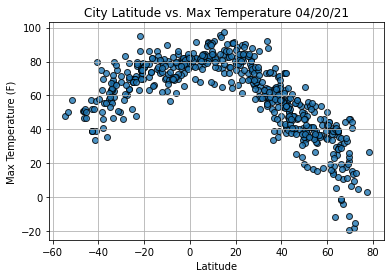

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

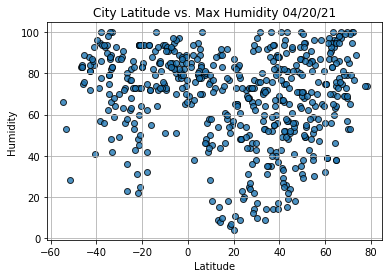

In [17]:
# Build the scatter plot for latitude vs. humidity 
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

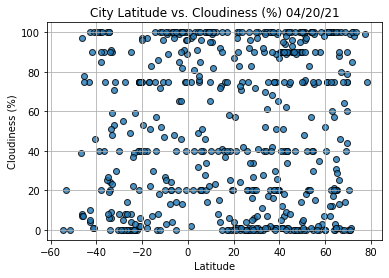

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

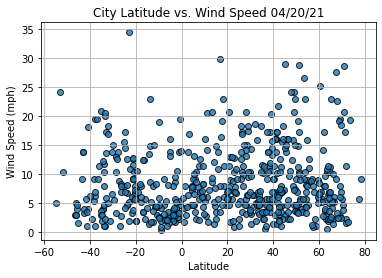

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_refactored_df.loc[13]
index13

City                     Pasighat
Country                        IN
Date          2021-04-20 19:48:45
Lat                       28.0667
Lng                       95.3333
Max Temp                    66.47
Humidity                       66
Cloudiness                     16
Wind Speed                   4.65
Name: 13, dtype: object

In [22]:
city_refactored_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [23]:
city_refactored_df.loc[(city_refactored_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bandarbeyla,SO,2021-04-20 19:48:42,9.4942,50.8122,82.11,76,100,8.23
3,Bhachau,IN,2021-04-20 19:48:43,23.2833,70.3500,80.53,48,71,7.81
4,Olafsvik,IS,2021-04-20 19:44:03,64.8945,-23.7142,39.90,74,36,11.16
5,Kodiak,US,2021-04-20 19:46:29,57.7900,-152.4072,42.80,87,90,6.91
7,San Quintin,MX,2021-04-20 19:48:44,30.4833,-115.9500,65.88,66,41,14.41


In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_refactored_df.loc[(city_refactored_df["Lat"] >= 0)]
southern_hemi_df = city_refactored_df.loc[(city_refactored_df["Lat"] < 0)]

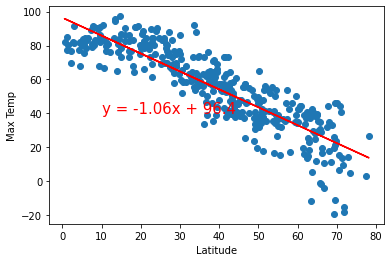

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

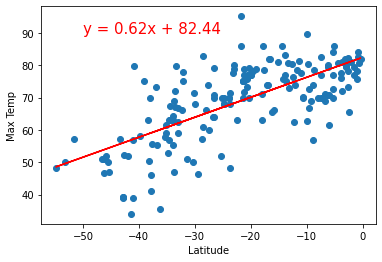

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

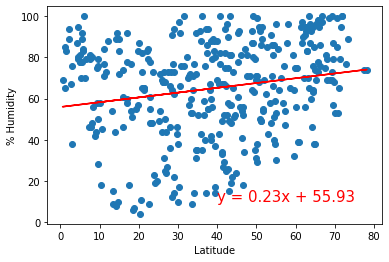

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

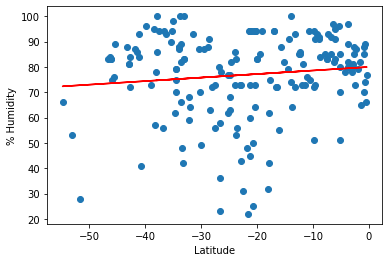

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


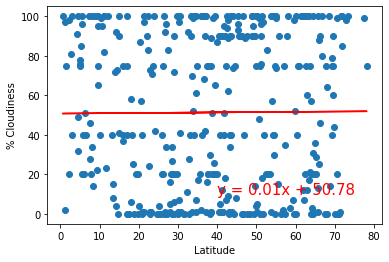

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

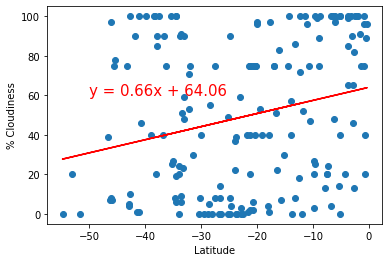

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


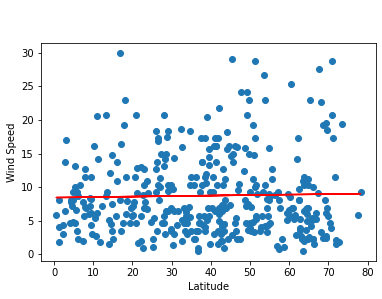

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

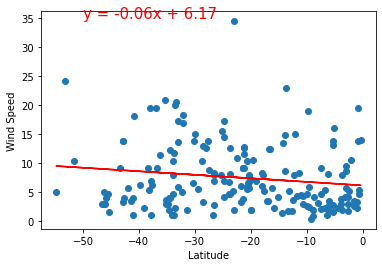

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))